Participants: Madeleine Cope, Anukul Singh, Arushi Sethi, Luis Villazon

In [4]:
#for colab only
#!pip install gurobipy

In [5]:
#for colab only
# params = {
# "WLSACCESSID": '9d19dc9d-e273-400c-83a4-1485326f6c9b',
# "WLSSECRET": '6f570b33-7e6b-48da-ae09-a20176b96ff8',
# "LICENSEID": 2429014,
# }
import gurobipy as gp
#TIME LIMIT AND ENVIRONMENT SET UP
time_limit= 3600 #timelimit for gurobi later on
env = gp.Env()
env.setParam('TimeLimit',time_limit)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-20
Set parameter TimeLimit to value 3600


### Import Insample file and form correlation matrix

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', None)  # Display all content in each cell



# Load the CSV file
data_2019 = pd.read_csv("stocks2019.csv")

# Set the first column as the index
data_2019.set_index(data_2019.columns[0], inplace=True)

# Calculate daily returns for the (now) second column
returns_2019 = data_2019.iloc[:, 1:].pct_change().dropna()

ncols = returns_2019.shape[1]

# Compute the correlation matrix
correlation_matrix = returns_2019.corr()

#index_return variable
index_return= data_2019.iloc[:, 0].pct_change().dropna()

correlation_matrix

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,ANSS,AAPL,AMAT,ASML,ADSK,ADP,BIDU,BIIB,BMRN,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTXS,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,EXPE,FB,FAST,FISV,GILD,IDXX,ILMN,INCY,INTC,INTU,ISRG,JD,KLAC,KHC,LRCX,LBTYA,LBTYK,LULU,MAR,MXIM,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,PCAR,PAYX,PYPL,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TTWO,TSLA,TXN,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,0.384463,0.430625,0.361095,0.405220,0.396975,0.344495,0.395413,-0.013884,0.296529,0.334636,0.360282,0.391044,0.385927,0.184583,0.203807,0.228380,0.323454,0.332359,0.236458,0.318057,0.262799,0.249355,0.350370,0.266635,0.073396,0.263380,0.148975,0.262380,0.550631,0.051115,0.258372,0.370334,0.235442,0.333983,0.191065,0.309385,0.257249,0.143902,0.302206,0.318420,0.340220,0.377682,0.366977,0.111882,0.392203,0.237896,0.238831,0.224577,0.365611,0.344972,0.169715,0.340266,0.347604,0.494902,0.126022,0.187719,0.103448,0.404657,0.288487,0.435949,0.312378,0.199117,0.277423,0.377171,0.381498,0.221017,0.202172,0.172443,0.238661,0.266641,0.207980,0.254108,0.264794,0.317856,0.264508,0.459003,0.141876,0.606044,0.151106,0.362855,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,0.734335,0.506128,0.403986,0.492675,0.698280,0.608627,0.384599,0.056341,0.437051,0.405866,0.378621,0.703708,0.491545,0.442387,0.311497,0.443815,0.494372,0.490194,0.491194,0.371764,0.357303,0.386061,0.396597,0.346259,0.286548,0.415695,0.171838,0.352897,0.369987,0.260755,0.175659,0.519541,0.348482,0.561491,0.246288,0.413335,0.401516,0.257723,0.350632,0.654460,0.514035,0.458045,0.455519,0.038035,0.411526,0.290095,0.299017,0.321704,0.454328,0.458907,0.434544,0.450580,0.380019,0.732154,0.155459,0.389616,0.336543,0.406933,0.463102,0.470978,0.400561,0.196998,0.362788,0.615440,0.649595,0.351308,0.281048,0.214741,0.402400,0.378890,0.248693,0.397804,0.373219,0.588248,0.453000,0.665304,0.342151,0.375744,0.321398,0.414311,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,0.491718,0.495587,0.500514,0.484464,0.506940,0.460823,0.333593,-0.009568,0.314256,0.343055,0.473499,0.492143,0.332285,0.283406,0.332031,0.218573,0.379793,0.415469,0.272477,0.316672,0.229287,0.314570,0.323634,0.285822,0.248165,0.242996,0.164013,0.379213,0.294744,0.075138,0.208031,0.387843,0.362471,0.328862,0.277880,0.391660,0.248443,0.204335,0.374101,0.407107,0.390392,0.434383,0.549226,0.004471,0.457499,0.211614,0.245803,0.227572,0.457025,0.520926,0.288064,0.513068,0.524794,0.532392,0.184384,0.254079,0.178154,0.329558,0.391994,0.635587,0.428146,0.180497,0.368060,0.457976,0.390674,0.245743,0.182679,0.259105,0.246184,0.380227,0.227349,0.358481,0.445509,0.380086,0.330888,0.500779,0.253952,0.346429,0.278383,0.539027,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,0.407135,0.313157,0.263860,0.387589,0.375616,0.323390,0.289485,0.170288,0.515202,0.312177,0.279806,0.397016,0.301615,0.323023,0.185758,0.272985,0.273787,0.361341,0.302759,0.263635,0.299558,0.258358,0.245804,0.253366,0.153835,0.349227,0.062785,0.334416,0.243374,0.158643,0.163077,0.362151,0.300743,0.305045,0.519983,0.257048,0.409924,0.481356,0.244960,0.303728,0.372635,0.301141,0.239313,0.069035,0.304176,0.181080,0.177876,0.166575,0.298334,0.309546,0.282736,0.314493,0.314504,0.395653,0.191798,0.131173,0.230281,0.202701,0.334630,0.367071,0.276148,0.111956,0.308244,0.371901,0.312942,0.098195,0.273931,0.100726,0.517333,0.239847,0.361483,0.294579,0.286845,0.385343,0.174419,0.465856,0.253474,0.156817,0.15

### Setting up Optmization Model

In [7]:
import numpy as np
import gurobipy as gp
import pandas as pd

In [8]:
from gurobipy import Model, GRB

def select_stocks(correlation_matrix, m):
    n = correlation_matrix.shape[0]

    # Initialize model
    model = Model(env=env)

    # Decision variables
    y = model.addVars(n, vtype=GRB.BINARY, name="y")
    x = model.addVars(n, n, vtype=GRB.BINARY, name="x")

    # Objective
    model.setObjective(sum(correlation_matrix.iloc[i, j] * x[i, j] for i in range(n) for j in range(n)), GRB.MAXIMIZE)

    # Constraints
    model.addConstr(sum(y[j] for j in range(n)) == m, "Constraint_1")

    for i in range(n):
        model.addConstr(sum(x[i, j] for j in range(n)) == 1, f"Constraint_2_{i}")

        for j in range(n):
            model.addConstr(x[i, j] <= y[j], f"Constraint_3_{i}_{j}")


    model.Params.OutputFlag = 0
    # Solve the model
    model.optimize()

    # Extract selected stocks
    selected_index = [j for j in range(n) if y[j].X > 0.5]
    selected_stocks = [correlation_matrix.columns[i] for i in selected_index]


    # Convert both lists into a DataFrame
    df_selected = pd.DataFrame({'Indices': [selected_index],'Stocks': [selected_stocks]})

    return df_selected


### Enter number of stocks selected

In [9]:
m = int(input('Select the number of stocks:\n')) #use 5

In [10]:
selected_stocks_df = select_stocks(correlation_matrix,m)
selected_stocks_df

,Indices,Stocks
0,"[56, 59, 63, 94, 98]","[LBTYK, MXIM, MSFT, VRTX, XEL]"


### Load the outsample file and Calculate returns and isolate NDX

In [11]:
## Load the 2020 file and calculate its returns
data_2020 = pd.read_csv("stocks2020.csv")

# Set the first column as the index
data_2020.set_index(data_2020.columns[0], inplace=True)

returns_2020 = data_2020.iloc[:, 1:].pct_change().dropna()

ndx_returns_2020 = data_2020["NDX"].pct_change().dropna()

In [12]:
import gurobipy as gp
from gurobipy import GRB

selected_indices=[]
index_returns_2019=[]


def optimize_weights(m,selected_indices, returns_2019, index_returns_2019):
    selected_indices = select_stocks(correlation_matrix,m).loc[0, 'Indices']
    selected_returns = returns_2019.iloc[:, selected_indices]
    # Assuming the index returns are in a column named "NDX" in the original data_2019 dataframe
    index_returns_2019 = data_2019["NDX"].pct_change().dropna()
    a, T = m, selected_returns.shape[0]

    model_weights = gp.Model("PortfolioOptimization")
    w = model_weights.addVars(a, vtype=GRB.CONTINUOUS, name="w")
    z = model_weights.addVars(T, vtype=GRB.CONTINUOUS, name="z")

    model_weights.setObjective(gp.quicksum(z[t] for t in range(T)), GRB.MINIMIZE)

    for t in range(T):
        model_weights.addConstr(z[t] >= index_returns_2019.iloc[t] - gp.quicksum(w[i] * selected_returns.iloc[t, i] for i in range(a)))
        model_weights.addConstr(z[t] >= -index_returns_2019.iloc[t] + gp.quicksum(w[i] * selected_returns.iloc[t, i] for i in range(a)))

    model_weights.addConstr(gp.quicksum(w[i] for i in range(a)) == 1)

    for i in range(a):
        model_weights.addConstr(w[i] >= 0)

    model_weights.Params.OutputFlag = 0
    model_weights.optimize()

    performance = model_weights.objVal

    if model_weights.status == GRB.OPTIMAL:
        weights = [w[i].x for i in range(a)]
        selected_stocks = [correlation_matrix.columns[i] for i in selected_indices]

        # Calculate the daily returns for 2020 data

        portfolio_returns_2020 = returns_2020.iloc[:, selected_indices].dot(np.array(weights))

        tracking_errors = []
        for t in range(len(ndx_returns_2020)):
            tracking_error_t = abs(ndx_returns_2020.iloc[t] - portfolio_returns_2020.iloc[t])
            tracking_errors.append(tracking_error_t)

        index_2020 = sum(tracking_errors)

        df_weights = pd.DataFrame({'Number of stocks': [m],
                                   'Indices': [selected_indices],
                                   'Stocks': [selected_stocks],
                                   'Weights':[weights],
                                   'Performance (Insample)' : [performance],
                                   'Performance (Outsample)':[index_2020]})

        return df_weights
    else:
        return None


In [13]:
results = optimize_weights(5,selected_indices, returns_2019, index_returns_2019)
results

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-20


,Number of stocks,Indices,Stocks,Weights,Performance (Insample),Performance (Outsample)
0,5,"[56, 59, 63, 94, 98]","[LBTYK, MXIM, MSFT, VRTX, XEL]","[0.04886174835252491, 0.21038806005665553, 0.5803519807862964, 0.07119021516911037, 0.08920799563541283]",0.789178,1.112437


In [14]:
all_results = []

for m in range(10, ncols+1, 10):
    select_df = select_stocks(correlation_matrix, m)
    results_df = optimize_weights(m,selected_indices, returns_2019, index_returns_2019)
    all_results.append(results_df)

cumulative_results = pd.concat(all_results, ignore_index=True)
cumulative_results

,Number of stocks,Indices,Stocks,Weights,Performance (Insample),Performance (Outsample)
0,10,"[0, 4, 40, 53, 56, 59, 63, 79, 94, 98]","[ATVI, ALGN, EXPE, KHC, LBTYK, MXIM, MSFT, ROST, VRTX, XEL]","[0.04420008162515515, 0.02499587429403977, 0.02150098184560955, 0.023389314412142398, 0.03783494391598981, 0.15698580809468035, 0.4910305234120523, 0.0911518044588584, 0.046216031808782046, 0.06269463613269025]",0.701218,1.102404
1,20,"[0, 4, 5, 10, 15, 17, 30, 36, 40, 51, 53, 56, 59, 63, 64, 72, 76, 91, 94, 98]","[ATVI, ALGN, GOOGL, ANSS, ADP, BIIB, CMCSA, DLTR, EXPE, JD, KHC, LBTYK, MXIM, MSFT, MRNA, PCAR, PDD, ULTA, VRTX, XEL]","[0.0246128451625659, 0.012773472041639327, 0.2043523158854835, 0.0744541929495624, 0.01941354139204288, 0.0065169485696624846, 0.04529662386544985, 0.01995678968025231, 0.007310069699686221, 0.03937154106780161, 0.03618476446490949, 0.0033070823213016036, 0.11154798202438464, 0.24394752145679896, 0.0052746982892368085, 0.0449096090976265, 0.01162030700704926, 0.013698175980572167, 0.03491081794021952, 0.040540701103754455]",0.478836,0.899598
2,30,"[0, 1, 5, 12, 15, 17, 28, 30, 34, 35, 36, 40, 46, 51, 53, 56, 57, 59, 63, 64, 66, 72, 75, 76, 77, 86, 88, 91, 94, 98]","[ATVI, ADBE, GOOGL, AMAT, ADP, BIIB, CTXS, CMCSA, DXCM, DOCU, DLTR, EXPE, ILMN, JD, KHC, LBTYK, LULU, MXIM, MSFT, MRNA, MNST, PCAR, PEP, PDD, QCOM, TMUS, TSLA, ULTA, VRTX, XEL]","[0.016889901491185348, 0.031105451684456498, 0.18063401599195625, 0.03814396109159537, 0.0, 0.002714304247327306, 0.0, 0.05258331223545117, 0.024380141367161264, 0.0, 0.009086141155451102, 0.03287368959709584, 0.0024986343637322037, 0.02776205562219087, 0.007674981942931485, 0.015617808066050997, 0.01838412441856238, 0.06751392016117207, 0.2533016813412306, 0.00499871510589452, 0.0, 0.0370562161852007, 0.05328053052615635, 0.00272284331584433, 0.020303301653445422, 0.004600906065708365, 0.03379896623609255, 0.011132161512151094, 0.03666205666709325, 0.01428017795486262]",0.418015,0.769110
3,40,"[0, 1, 4, 5, 8, 12, 15, 17, 23, 25, 29, 30, 31, 34, 35, 36, 37, 40, 46, 51, 53, 55, 57, 59, 60, 63, 64, 65, 66, 71, 72, 76, 77, 81, 86, 88, 91, 94, 95, 98]","[ATVI, ADBE, ALGN, GOOGL, AMGN, AMAT, ADP, BIIB, CERN, CHKP, CTSH, CMCSA, CPRT, DXCM, DOCU, DLTR, EBAY, EXPE, ILMN, JD, KHC, LBTYA, LULU, MXIM, MELI, MSFT, MRNA, MDLZ, MNST, ORLY, PCAR, PDD, QCOM, SIRI, TMUS, TSLA, ULTA, VRTX, WBA, XEL]","[0.028892946012893987, 0.02916423338576784, 0.00620931560122538, 0.13478258559923412, 0.045917730111606915, 0.027686816125934106, 0.0, 0.0, 0.0034677219229693073, 0.015503860562621447, 0.051733082048762494, 0.029404111816168962, 0.0, 0.005805790091979205, 0.0005455228618793395, 0.011572033145196284, 0.039371842825993354, 0.014628919032589376, 0.004731296837499832, 0.03203029501573493, 0.010644295701426226, 0.0, 0.012655273907544855, 0.07323045241236358, 0.008954245524452502, 0.22163760878852667, 0.007989525653661839, 0.016959882074240172, 0.009115408336972886, 0.0, 0.007170300184877943, 0.00615668652944115, 0.020102230508839913, 0.04304831781007232, 0.02465652718249102, 0.025884817913517964, 0.011537166982567685, 0.0069369021100501435, 0.008546508133750222, 0.0033257472471460024]",0.370517,0.791047
4,50,"[0, 1, 3, 4, 5, 8, 12, 15, 17, 22, 23, 24, 25, 28, 29, 30, 31, 32, 34, 35, 36, 37, 40, 44, 46, 51, 53, 55, 57, 59, 60, 63, 64, 66, 68, 71, 72, 75, 76, 77, 79, 80, 81, 84, 86, 88, 91, 94, 95, 98]","[ATVI, ADBE, ALXN, ALGN, GOOGL, AMGN, AMAT, ADP, BIIB, CDW, CERN, CHTR, CHKP, CTXS, CTSH, CMCSA, CPRT, COST, DXCM, DOCU, DLTR, EBAY, EXPE, GILD, ILMN, JD, KHC, LBTYA, LULU, MXIM, MELI, MSFT, MRNA, MNST, NFLX, ORLY, PCAR, PEP, PDD, QCOM, ROST, SGEN, SIRI, SBUX, TMUS, TSLA, ULTA, VRTX, WBA, XEL]","[0.019456316413978336, 0.03434141488995055, 0.007062188505381988, 0.007860960815348391, 0.1295147821603739, 0.03049140388467582, 0.03771634412862756, 0.0, 0.0, 0.022407960906969296, 0.003761736284537689, 0.03670060178851835, 0.02148786687484237, 0.0, 0.043200113341847035, 0.02191782716666221, 0.0, 0.029332

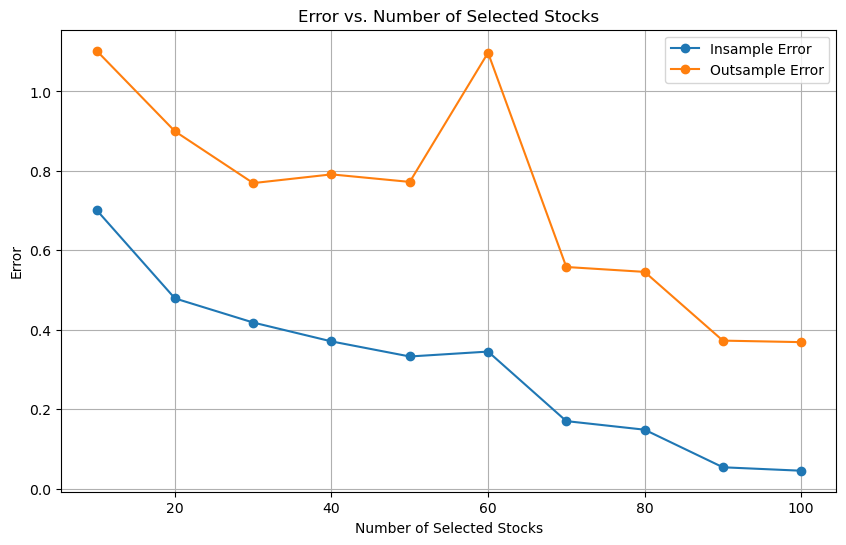

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plotting both insample and outsample performance
plt.plot(cumulative_results['Number of stocks'], cumulative_results['Performance (Insample)'], marker='o', label='Insample Error')
plt.plot(cumulative_results['Number of stocks'], cumulative_results['Performance (Outsample)'], marker='o', label='Outsample Error')

plt.title('Error vs. Number of Selected Stocks')
plt.xlabel('Number of Selected Stocks')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Part 4

In [16]:
#establishing variables
bigM= 1 #max value of each weight is 1 (100%) so this should be bigM
n=returns_2019.shape[1]
p=returns_2019.shape[0]
n_2=returns_2020.shape[1]
p_2=returns_2020.shape[0]
m=[5,10,20,30,40,50,60,70,80,90,100]


In [17]:
#making second method
def second_mod(m):
  method2=gp.Model(env=env)
  method2.Params.OutputFlag=0

  #stock is either selected or not
  var1=method2.addMVar(n, vtype='B')

  #weight of stocks
  var2=method2.addMVar(n)

  #store difference in NASDAQ index and portfolio index
  var3=method2.addMVar(p)

  #objective

  method2.setObjective(gp.quicksum(var3[i] for i in range(p)), gp.GRB.MINIMIZE)

  #constraints

  #weight of all choices=1
  method2.addConstr(gp.quicksum(var2[i] for i in range(n))==1)

  #set number of stocks
  method2.addConstr(gp.quicksum(var1[i] for i in range(n))==m)

  #big M
  method2.addConstrs(var2[i]<=var1[i] *bigM for i in range(n))


  #more constraints

  #absolute value
  method2.addConstrs((var3[i]>= index_return.iloc[i]-gp.quicksum(var2[j]*returns_2019.iloc[i,j] for j in range(n))) for i in range(p))

  #another absolute value
  method2.addConstrs((var3[i]>= gp.quicksum(var2[j]*returns_2019.iloc[i,j] for j in range(n)) - index_return.iloc[i]) for i in range(p))

  #optimization time
  method2.optimize()

  #things to print
  performance2 = method2.objVal
  stocks=[returns_2019.columns[i] for i in range(n) if var1.x[i]==1]
  weights= [var2.x[i] for i in range(n) if var1.x[i]==1]


  return performance2, stocks, weights




In [18]:
import os
import os.path

In [19]:
#put into a loop for all values of m
if os.path.isfile('method2.csv'):
  df=pd.read_csv('method2.csv')
  df=df.drop(columns=['Unnamed: 0'])
else:
  df = pd.DataFrame(columns=['Number of stocks', 'Stocks', 'Weights', 'Performance (In sample)','Performance (Out sample)'])
  for a in m:
    e,s,w=second_mod(a)
    yhat=[0]*p_2
    for i in range(len(s)):
      yhat+=returns_2020[s[i]]*w[i]
    oose=sum(abs(ndx_returns_2020-yhat))
    new_row = {'Number of stocks':a, 'Stocks':s, 'Weights':w, 'Performance (In sample)':e,'Performance (Out sample)':oose}
    df = df.append(new_row, ignore_index=True)

  df.to_csv('method2.csv')
    #out of sample error


/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_36375/481713194.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_36375/481713194.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_36375/481713194.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_36375/481713194.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

In [23]:
df

,Number of stocks,Stocks,Weights,Performance (In sample),Performance (Out sample)
0,5,"[AMZN, ADI, AAPL, MSFT, MDLZ]","[0.25012259799984415, 0.11375807105291444, 0.1916922061629509, 0.28986928001351514, 0.15455784477077586]",0.499259,0.777362
1,10,"[GOOG, AMZN, AAPL, CHTR, FB, GILD, MSFT, PCAR, TXN, VRSK]","[0.0916577050983396, 0.12775583419456224, 0.14548359786649365, 0.053330673924296725, 0.06453430070092206, 0.05782932147065084, 0.2148537933243309, 0.06732189322720131, 0.10201402754175896, 0.07521885265144371]",0.301498,0.638550
2,20,"[ADBE, GOOG, AMZN, AAPL, AVGO, CSCO, CMCSA, FB, ILMN, INTC, KLAC, MSFT, NFLX, ORLY, PAYX, PEP, ROST, TXN, VRTX, WBA]","[0.06132477035577345, 0.0920113291902568, 0.10575174936081824, 0.09995754597023827, 0.041249803460291674, 0.0289139899553455, 0.046453228283709375, 0.05801960798282517, 0.02058805112849524, 0.044035804454730515, 0.026294835026418877, 0.09417385697736941, 0.024254109248858922, 0.022802351224962342, 0.045931284637530316, 0.03978260098828672, 0.04466799857974514, 0.04449381071531414, 0.030587245335733357, 0.028706027123296392]",0.165028,0.570820
3,30,"[ADBE, GOOGL, AMZN, AMGN, AAPL, ADP, BIIB, BMRN, BKNG, AVGO, CHTR, CSCO, CMCSA, COST, CSX, FB, GILD, ILMN, INTC, LRCX, MU, MSFT, MDLZ, NFLX, PAYX, PYPL, QCOM, SBUX, TXN, WBA]","[0.033434489290841175, 0.08475072666782969, 0.10612321346639482, 0.011413431782997474, 0.11603650502057371, 0.03119043578148157, 0.00738837023760353, 0.010157029793084369, 0.011685921704409847, 0.020998027042146428, 0.016421499622241955, 0.03517326928791517, 0.026733620194036883, 0.03068399921271422, 0.02182421574071606, 0.051207407747236665, 0.027834448018038752, 0.012999141892947331, 0.03686748177845837, 0.011931118488439637, 0.017476804462097352, 0.10234996593907143, 0.022075685969708, 0.022655613858619066, 0.03276002492291805, 0.02499606201095837, 0.014360292590061514, 0.014198307605446074, 0.028246856731444572, 0.016026033139568057]",0.109731,0.516360
4,40,"[ATVI, ADBE, AMD, GOOGL, AMZN, AMGN, AAPL, ASML, ADP, BIDU, BIIB, BKNG, AVGO, CSCO, CMCSA, COST, CSX, DLTR, FB, GILD, INTC, ISRG, LBTYK, MU, MSFT, MDLZ, NFLX, NXPI, PYPL, PEP, QCOM, REGN, SBUX, TMUS, TSLA, TXN, ULTA, VRTX, WBA, XLNX]","[0.008764061039988207, 0.028244905075773773, 0.00925730875557157, 0.08402199549849294, 0.10560362831991887, 0.010475496267770903, 0.1103308110038715, 0.012947464135154161, 0.034264042694849346, 0.008169429983566427, 0.006751395467592288, 0.012282897225612517, 0.01252228210412027, 0.029355222563294647, 0.02809310703039928, 0.01909544865126939, 0.019830832293069384, 0.008410604369404487, 0.052401120697089285, 0.0202926839445344, 0.037625872469405276, 0.01940693018924377, 0.00860110561151173, 0.014100657672539334, 0.09043765945049477, 0.023665708355740018, 0.02205316771402174, 0.006209921352622579, 0.024562048450756914, 0.018492129244820875, 0.01048029653571143, 0.009745105085208514, 0.01857441743423703, 0.011406692895249721, 0.006777914608144357, 0.019032858219285242, 0.005245225940157318, 0.015152458069907346, 0.010418354814403584, 0.0068967387651950405]",0.079903,0.428680
5,50,"[ADBE, AMD, GOOGL, AMZN, AMGN, AAPL, ASML, ADP, BIDU, BIIB, BKNG, AVGO, CHTR, CHKP, CSCO, CMCSA, COST, CSX, DLTR, FB, GILD, ILMN, INTC, ISRG, JD, KLAC, KHC, LULU, MXIM, MU, MSFT, MDLZ, NFLX, NVDA, PAYX, PYPL, PEP, QCOM, REGN, ROST, SBUX, SNPS, TMUS, TTWO, TSLA, TXN, ULTA, VRSN, VRTX, WBA]","[0.02068733730061017, 0.005203812935615695, 0.07904983801561326, 0.09925721148705523, 0.01809073689879549, 0.10373590314748712, 0.008972329830959106, 0.020389296778425922, 0.008416181104040446, 0.005931862970566172, 0.018217389342843643, 0.01418090158362531, 0.0038998793165180017, 0.0059217327596367214, 0.02455307030808178, 0.028749644109478372, 0.00931380627528286, 0.01745505900565018, 0.005905716678119925, 0.0547926074507308, 0.015024236224034536, 0.008652806302402685, 0.035035350581030765, 0.015452987173405085, 0.006156894067780042, 0.010390821580218429, 0.0066812226455394245, 0.0041708956144958995, 0.00842

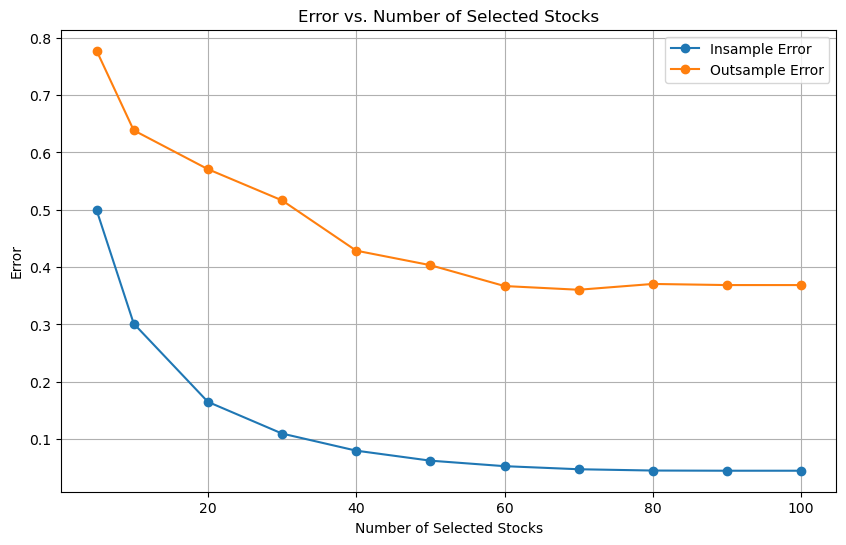

In [24]:
plt.figure(figsize=(10,6))

# Plotting both insample and outsample performance
plt.plot(df['Number of stocks'], df['Performance (In sample)'], marker='o', label='Insample Error')
plt.plot(df['Number of stocks'], df['Performance (Out sample)'], marker='o', label='Outsample Error')

plt.title('Error vs. Number of Selected Stocks')
plt.xlabel('Number of Selected Stocks')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()